In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection

In [221]:
now = datetime.now()
ticker = "^NSEI"
start = datetime(now.year - 10, now.month, now.day)
end = now
df_Nifty = yf.download(ticker, start, end)

# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    diff = data.diff(1).dropna()
    gain = diff.mask(diff < 0, 0)
    loss = diff.mask(diff > 0, 0).abs()
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df_Nifty['RSI'] = calculate_rsi(df_Nifty['Close'])

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

macd, signal_line = calculate_macd(df_Nifty['Close'])
df_Nifty['MACD'] = macd
df_Nifty['MACD_Signal'] = signal_line

# Calculate EMA 50
df_Nifty['EMA_50'] = df_Nifty['Close'].ewm(span=50, adjust=False).mean()

# Calculate SMA 20
df_Nifty['SMA_20'] = df_Nifty['Close'].rolling(window=20).mean()

# Calculate Stochastic RSI
def calculate_stoch_rsi(data, window=14, k_window=3, d_window=3):
    rsi = calculate_rsi(data, window)
    min_rsi = rsi.rolling(window=window).min()
    max_rsi = rsi.rolling(window=window).max()
    stoch_rsi = (rsi - min_rsi) / (max_rsi - min_rsi)
    k_line = stoch_rsi.rolling(window=k_window).mean()
    d_line = k_line.rolling(window=d_window).mean()
    return k_line, d_line

df_Nifty['StochRSI_K'], df_Nifty['StochRSI_D'] = calculate_stoch_rsi(df_Nifty['Close'])
df_Nifty.head(100)

/tmp/ipython-input-2808869008.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_Nifty = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
Date,,,,,,,,,,,,
2015-10-14,8107.899902,8139.299805,8096.350098,8102.399902,138900,NaN,0.000000,0.000000,8107.899902,NaN,NaN,NaN
2015-10-15,8179.500000,8190.549805,8129.799805,8134.350098,167200,NaN,5.711689,1.142338,8110.707749,NaN,NaN,NaN
2015-10-16,8238.150391,8246.400391,8147.649902,8193.650391,156400,NaN,14.800232,3.873917,8115.705500,NaN,NaN,NaN
2015-10-19,8275.049805,8283.049805,8239.200195,8262.549805,124500,NaN,24.695764,8.038286,8121.954296,NaN,NaN,NaN
2015-10-20,8261.650391,8294.049805,8229.200195,8280.299805,155100,NaN,31.098342,12.650297,8127.432574,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-03-04,7485.350098,7505.899902,7444.100098,7505.399902,281700,63.835717,-19.587493,-79.911873,7388.841578,7174.145044,0.960188,0.931961
2016-03-08,7485.299805,7527.149902,7442.149902,7486.399902,257000,70.802976,0.685857,-63.792327,7392.624254,7179.047534,0.960188,0.973458


In [222]:
df_Nifty.columns = [col for col, _ in df_Nifty.columns]
print(df_Nifty.columns)

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'RSI', 'MACD', 'MACD_Signal',
       'EMA_50', 'SMA_20', 'StochRSI_K', 'StochRSI_D'],
      dtype='object')


In [223]:
df_Nifty.head()

,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Date,,,,,,,,,,,,
2015-10-14,8107.899902,8139.299805,8096.350098,8102.399902,138900,NaN,0.000000,0.000000,8107.899902,NaN,NaN,NaN
2015-10-15,8179.500000,8190.549805,8129.799805,8134.350098,167200,NaN,5.711689,1.142338,8110.707749,NaN,NaN,NaN
2015-10-16,8238.150391,8246.400391,8147.649902,8193.650391,156400,NaN,14.800232,3.873917,8115.705500,NaN,NaN,NaN
2015-10-19,8275.049805,8283.049805,8239.200195,8262.549805,124500,NaN,24.695764,8.038286,8121.954296,NaN,NaN,NaN
2015-10-20,8261.650391,8294.049805,8229.200195,8280.299805,155100,NaN,31.098342,12.650297,8127.432574,NaN,NaN,NaN


In [224]:
df_Gnifty = pd.read_csv('/content/GIFT_NIFTY_PAST_10Y.csv')
df_Gnifty.head()

,Date,Open,Close,Change(%),High,Low
0,13 Oct 2025,"25,310.50","25,305.00",-0.02%,"25,355.00","25,226.00"
1,12 Oct 2025,"25,205.00","25,205.00",-,"25,205.00","25,205.00"
2,11 Oct 2025,"25,205.00","25,205.00",-,"25,205.00","25,205.00"
3,10 Oct 2025,"25,227.00","25,205.00",-0.09%,"25,468.00","25,205.00"
4,09 Oct 2025,"25,131.50","25,222.50",0.36%,"25,309.00","25,120.50"


## 2. Data Exploration and Foramting



In [225]:
df_Gnifty.rename(columns={
    'Close': 'GIFT_Close',
    'Open': 'GIFT_Open',
    'High': 'GIFT_High',
    'Low': 'GIFT_Low',
    'Vol.': 'GIFT_Volume',
    'Change %': 'GIFT_Change_Percent'
}, inplace=True)
df_Gnifty['Date'] = pd.to_datetime(df_Gnifty['Date'], format='%d %b %Y')
df_Gnifty.head()

,Date,GIFT_Open,GIFT_Close,Change(%),GIFT_High,GIFT_Low
0,2025-10-13,"25,310.50","25,305.00",-0.02%,"25,355.00","25,226.00"
1,2025-10-12,"25,205.00","25,205.00",-,"25,205.00","25,205.00"
2,2025-10-11,"25,205.00","25,205.00",-,"25,205.00","25,205.00"
3,2025-10-10,"25,227.00","25,205.00",-0.09%,"25,468.00","25,205.00"
4,2025-10-09,"25,131.50","25,222.50",0.36%,"25,309.00","25,120.50"


In [226]:
print(type(df_Gnifty['GIFT_Close'][0]))

<class 'str'>


In [227]:
df = pd.merge(df_Nifty, df_Gnifty, on='Date', how='inner')
display(df)

,Date,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D,GIFT_Open,GIFT_Close,Change(%),GIFT_High,GIFT_Low
0,2017-07-05,9637.599609,9643.650391,9607.349609,9619.750000,130800,52.232205,18.367372,25.236932,9481.942601,9601.505029,0.661727,0.413172,"9,639.00","9,636.00",-0.03%,"9,648.00","9,629.00"
1,2017-07-06,9674.549805,9700.700195,9639.950195,9653.599609,147400,61.156069,24.021644,24.993875,9489.495825,9602.037500,0.840574,0.626730,"9,663.00","9,680.00",0.18%,"9,680.00","9,636.00"
2,2017-07-07,9665.799805,9684.250000,9642.650391,9670.349609,141800,59.014493,27.479873,25.491074,9496.409706,9602.964990,0.948910,0.817070,"9,681.00","9,681.00",-,"9,681.00","9,681.00"
3,2017-07-12,9816.099609,9824.950195,9787.700195,9807.299805,145500,68.694955,56.564507,36.861263,9529.801613,9627.047412,1.000000,0.985555,"9,804.00","9,816.00",0.12%,"9,817.00","9,792.00"
4,2017-07-13,9891.700195,9897.250000,9853.450195,9855.799805,181300,73.361893,69.061867,43.301384,9543.993715,9640.724902,1.000000,0.992778,"9,873.00","9,886.00",0.13%,"9,888.00","9,867.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,2025-10-07,25108.300781,25220.900391,25076.300781,25085.300781,288000,45.623119,11.560556,18.264472,24908.007032,25024.359961,0.171565,0.139986,"25,152.00","25,217.00",0.26%,"25,309.00","25,145.50"
2017,2025-10-08,25046.150391,25192.500000,25008.500000,25079.750000,227400,40.305099,18.274524,18.266483,24913.424418,25033.237500,0.157538,0.164701,"25,224.50","25,123.00",-0.40%,"25,284.00","25,077.50"
2018,2025-10-09,25181.800781,25199.250000,25024.300781,25074.300781,286300,41.980149,34.147613,21.442709,24923.948982,25043.672559,0.114772,0.147958,"25,131.50","25,222.50",0.36%,"25,309.00","25,120.50"
2019,2025-10-10,25285.349609,25330.750000,25156.849609,25167.650391,232900,48.623271,54.454952,28.045157,24938.121555,25057.665039,0.160086,0.144132,"25,227.00","25,205.00",-0.09%,"25,468.00","25,205.00"


In [228]:
df.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
RSI,0
MACD,0
MACD_Signal,0
EMA_50,0


Text(0, 0.5, 'Close price')

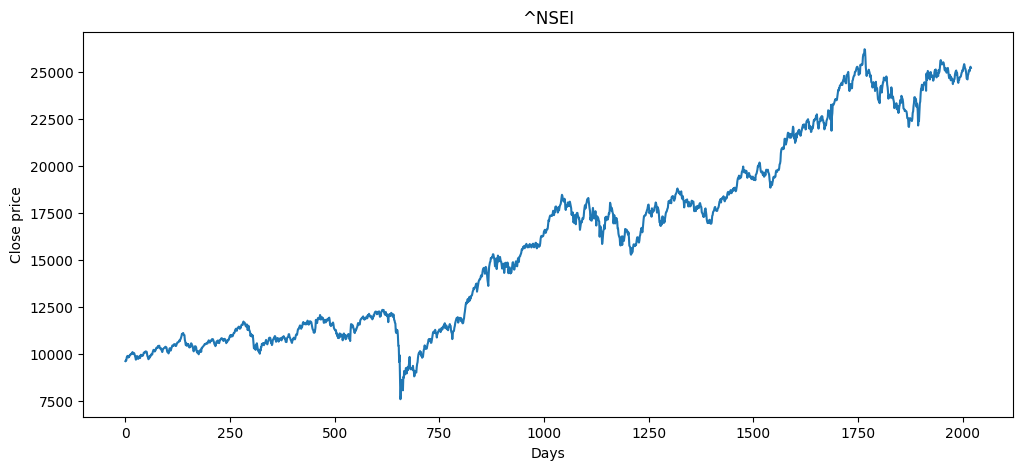

In [229]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

## 3. Feature Engineering

In [230]:
features = ['Open','Close', 'RSI', 'MACD', 'MACD_Signal', 'EMA_50', 'SMA_20', 'StochRSI_K', 'StochRSI_D', 'GIFT_Open', 'GIFT_Close']
data_to_process = df[features]

In [231]:
train_size = int(len(data_to_process) * 0.7)
data_training = data_to_process.iloc[:train_size]
data_testing = data_to_process.iloc[train_size:]

In [232]:
data_training.head()

,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D,GIFT_Open,GIFT_Close
0,9619.750000,9637.599609,52.232205,18.367372,25.236932,9481.942601,9601.505029,0.661727,0.413172,"9,639.00","9,636.00"
1,9653.599609,9674.549805,61.156069,24.021644,24.993875,9489.495825,9602.037500,0.840574,0.626730,"9,663.00","9,680.00"
2,9670.349609,9665.799805,59.014493,27.479873,25.491074,9496.409706,9602.964990,0.948910,0.817070,"9,681.00","9,681.00"
3,9807.299805,9816.099609,68.694955,56.564507,36.861263,9529.801613,9627.047412,1.000000,0.985555,"9,804.00","9,816.00"
4,9855.799805,9891.700195,73.361893,69.061867,43.301384,9543.993715,9640.724902,1.000000,0.992778,"9,873.00","9,886.00"


In [233]:
data_testing.head()

,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D,GIFT_Open,GIFT_Close
1414,17639.750000,17624.050781,80.795242,82.904877,50.684735,17544.651511,17421.722656,0.962672,0.922413,"17,679.00","17,623.00"
1415,17707.550781,17743.400391,80.623954,89.150961,58.377980,17552.445585,17453.517676,0.967618,0.950497,"17,688.00","17,767.00"
1416,17761.550781,17769.250000,74.704485,95.090728,65.720530,17560.947719,17484.385156,0.883049,0.937779,"17,740.00","17,782.00"
1417,17767.300781,17813.599609,74.887762,102.198597,73.016143,17570.855636,17521.220117,0.712942,0.854536,"17,761.00","17,829.00"
1418,17813.099609,17915.050781,73.028524,114.695755,81.352066,17584.353485,17569.720117,0.433994,0.676661,"17,896.00","18,004.00"


## 4. Data Preprocessing

In [234]:
df.shape

(2021, 18)

In [235]:
from sklearn.preprocessing import MinMaxScaler
import joblib

In [236]:
# Convert string columns to numeric by removing commas in data_training
for col in ['GIFT_Open', 'GIFT_Close']:
    data_training[col] = data_training[col].astype(str).str.replace(',', '', regex=False)
    data_training[col] = pd.to_numeric(data_training[col])


scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_training)
joblib.dump(scaler, 'scaler.gz')
data_training_array = scaler.transform(data_training)

/tmp/ipython-input-2997238349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_training[col] = data_training[col].astype(str).str.replace(',', '', regex=False)
/tmp/ipython-input-2997238349.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_training[col] = pd.to_numeric(data_training[col])
/tmp/ipython-input-2997238349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [237]:
data_training_array.shape

(1414, 11)

## 5. Sequence Creation

In [238]:
x_train = []
y_train = []
time_step = 100

# Get the indices for 'Close' and 'Open' from the features list
close_index = features.index('Close')
open_index = features.index('Open')

for i in range(time_step, data_training_array.shape[0]):
    x_train.append(data_training_array[i-time_step: i])
    y_train.append(data_training_array[i, [close_index, open_index]])

x_train, y_train = np.array(x_train), np.array(y_train)

In [239]:
x_train

array([[[0.16069544, 0.180977  , 0.49032466, ..., 0.41317194,
         0.13753687, 0.14351981],
        [0.16376608, 0.18427546, 0.58638079, ..., 0.62672954,
         0.13974926, 0.14760182],
        [0.16528554, 0.18349437, 0.56332894, ..., 0.81707037,
         0.14140855, 0.14769459],
        ...,
        [0.23037748, 0.24637908, 0.53403863, ..., 0.47195314,
         0.20787242, 0.21430559],
        [0.22935695, 0.24558011, 0.51883708, ..., 0.6156397 ,
         0.20759587, 0.21068745],
        [0.22537005, 0.23355128, 0.38845388, ..., 0.68234091,
         0.20390855, 0.20335838]],

       [[0.16376608, 0.18427546, 0.58638079, ..., 0.62672954,
         0.13974926, 0.14760182],
        [0.16528554, 0.18349437, 0.56332894, ..., 0.81707037,
         0.14140855, 0.14769459],
        [0.17770884, 0.1969113 , 0.66752905, ..., 0.98555545,
         0.15274705, 0.16021894],
        ...,
        [0.22935695, 0.24558011, 0.51883708, ..., 0.6156397 ,
         0.20759587, 0.21068745],
        [0.2

In [240]:
x_train.shape

(1314, 100, 11)

In [241]:
y_train.shape

(1314, 2)

In [242]:
x_train.ndim

3

In [243]:
y_train.ndim

2

## 6. Model Building

In [244]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [245]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [246]:
model = Sequential()

model.add(Input(shape=(100, x_train.shape[2])))
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # Give Sequence of output
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(2))

## 7. Model Training

In [247]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=150)

Epoch 1/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0430
Epoch 2/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.9337e-04
Epoch 3/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 4/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.2547e-04
Epoch 5/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4438e-04
Epoch 6/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9.4300e-04
Epoch 7/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.4724e-04
Epoch 8/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0010
Epoch 9/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011
Epoch 10/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.0082e-04
Epoch 11/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.4243e-04
Epoch 12/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.5038e-04
Epoch 13/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 4.6382e-04
Epoch 14/150
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 7.8673e-04
Epoch 15/150
42/4

In [248]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 128)       │        71,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 368,297 (1.40 MB)

 Trainable params: 122,765 (479.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,532 (959.11 KB)

In [249]:
model.save('Model_v2.keras')

## 8. Preparing Test Data

In [250]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [251]:
final_df

,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D,GIFT_Open,GIFT_Close
0,18326.099609,18484.099609,66.327274,198.471190,208.330705,17812.978878,18181.049902,0.162823,0.067229,18489.0,18637.0
1,18528.449219,18512.750000,65.389355,204.111117,207.486787,17840.420883,18219.839941,0.278739,0.160142,18625.0,18661.0
2,18430.550781,18562.750000,64.401974,210.192414,208.027913,17868.747515,18258.637402,0.368762,0.270108,18586.0,18623.0
3,18552.449219,18618.050781,68.307982,216.973067,209.816943,17898.131957,18288.929980,0.439557,0.362353,18700.0,18676.0
4,18625.699219,18758.349609,78.731365,231.004846,214.054524,17931.865982,18319.577441,0.656974,0.488431,18769.0,18815.0
...,...,...,...,...,...,...,...,...,...,...,...
702,25085.300781,25108.300781,45.623119,11.560556,18.264472,24908.007032,25024.359961,0.171565,0.139986,"25,152.00","25,217.00"
703,25079.750000,25046.150391,40.305099,18.274524,18.266483,24913.424418,25033.237500,0.157538,0.164701,"25,224.50","25,123.00"
704,25074.300781,25181.800781,41.980149,34.147613,21.442709,24923.948982,25043.672559,0.114772,0.147958,"25,131.50","25,222.50"
705,25167.650391,25285.349609,48.623271,54.454952,28.045157,24938.121555,25057.665039,0.160086,0.144132,"25,227.00","25,205.00"


In [252]:
# Convert string columns to numeric by removing commas in final_df
for col in ['GIFT_Open', 'GIFT_Close']:
    final_df[col] = final_df[col].astype(str).str.replace(',', '', regex=False)
    final_df[col] = pd.to_numeric(final_df[col])

input_data = scaler.transform(final_df)
input_data.shape

(707, 11)

In [253]:
x_test = []
y_test = []

close_index = features.index('Close')
open_index = features.index('Open')

for i in range(time_step, input_data.shape[0]):
    x_test.append(input_data[i-time_step:i])
    y_test.append(input_data[i, [close_index, open_index]])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(607, 100, 11)
(607, 2)


## 9. Making Prediction

In [254]:
y_predicted = model.predict(x_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [255]:
dummy_array = np.zeros(shape=(len(y_predicted), len(features)))
close_index = features.index('Close')
open_index = features.index('Open')

dummy_array[:, close_index] = y_predicted[:, 0]
dummy_array[:, open_index] = y_predicted[:, 1]

y_predicted_final = scaler.inverse_transform(dummy_array)

In [256]:
dummy_y_test = np.zeros(shape=(len(y_test), len(features)))

close_index = features.index('Close')
open_index = features.index('Open')

dummy_y_test[:, close_index] = y_test[:, 0]
dummy_y_test[:, open_index] = y_test[:, 1]


y_test_actual = scaler.inverse_transform(dummy_y_test)

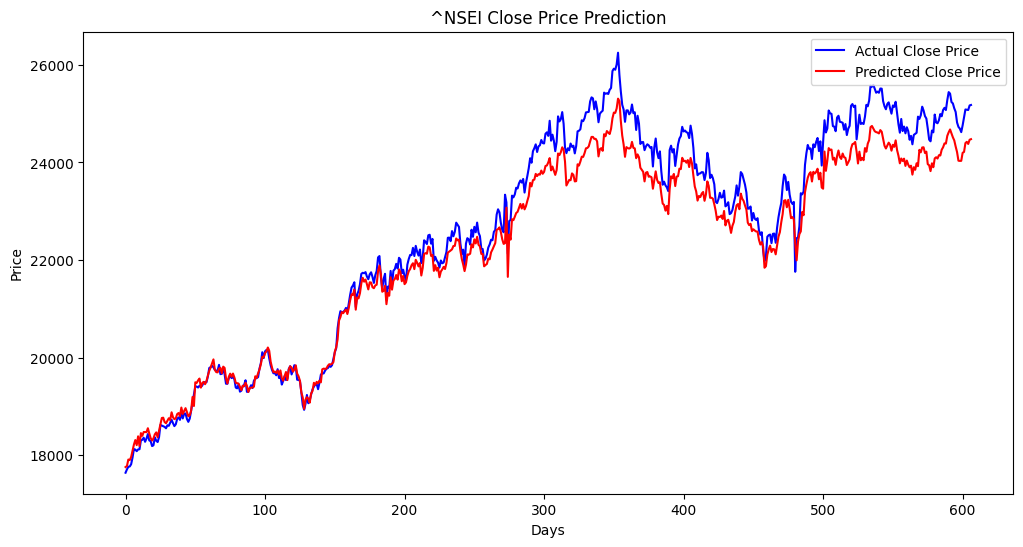

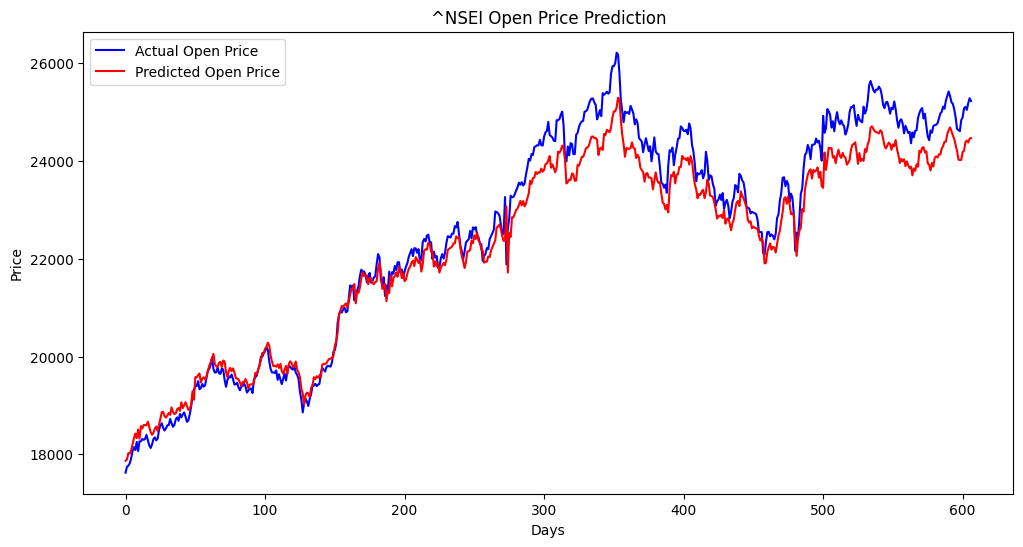

In [257]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 0], 'b', label='Actual Close Price')
plt.plot(y_predicted_final[:, 0], 'r', label='Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title(f"{ticker} Close Price Prediction")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 1], 'b', label='Actual Open Price')
plt.plot(y_predicted_final[:, 1], 'r', label='Predicted Open Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title(f"{ticker} Open Price Prediction")
plt.legend()
plt.show()

## 10. Model Evalution

In [258]:
from sklearn.metrics import mean_squared_error, r2_score

In [259]:
# Calculate MSE for Close and Open prices separately
mse_close = mean_squared_error(y_test[:, 0], y_predicted[:, 0])
mse_open = mean_squared_error(y_test[:, 1], y_predicted[:, 1])

print(f"Mean Squred Error (MSE) for Close Price: {mse_close}")
print(f"Mean Squred Error (MSE) for Open Price: {mse_open}")

Mean Squred Error (MSE) for Close Price: 0.0019617906915963797
Mean Squred Error (MSE) for Open Price: 0.0018591559768940211


In [260]:
# Calculate RMSE for Close and Open prices separately
rmse_close = np.sqrt(mean_squared_error(y_test[:, 0], y_predicted[:, 0]))
rmse_open = np.sqrt(mean_squared_error(y_test[:, 1], y_predicted[:, 1]))

print(f"Root Mean Squred Error (RMSE) for Close Price: {rmse_close}")
print(f"Root Mean Squred Error (RMSE) for Open Price: {rmse_open}")

Root Mean Squred Error (RMSE) for Close Price: 0.044292106425370875
Root Mean Squred Error (RMSE) for Open Price: 0.04311793103679745


In [261]:
# Calculate R-Squared for Close and Open prices separately
r2_close = r2_score(y_test[:, 0], y_predicted[:, 0])
r2_open = r2_score(y_test[:, 1], y_predicted[:, 1])

print(f"R-Squared for Close Price: {r2_close}")
print(f"R-Squared for Open Price: {r2_open}")

R-Squared for Close Price: 0.9518093332372863
R-Squared for Open Price: 0.9558426692092862


In [262]:
# Print model confidence for Close and Open prices separately
r2_close = r2_score(y_test[:, 0], y_predicted[:, 0])
r2_open = r2_score(y_test[:, 1], y_predicted[:, 1])

print(f"Model Confidence (R-squared) for Close Price: {(r2_close * 100):.2f}%")
print(f"Model Confidence (R-squared) for Open Price: {(r2_open * 100):.2f}%")

Model Confidence (R-squared) for Close Price: 95.18%
Model Confidence (R-squared) for Open Price: 95.58%
